# House Prediction using supervised learing

# EDA

In [82]:
import pandas as pd

# Load data
df = pd.read_csv('../data/train.csv')

In [84]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
df.shape

(1460, 81)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [87]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. Check Missing Values

In [88]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

### Plot missing values:

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

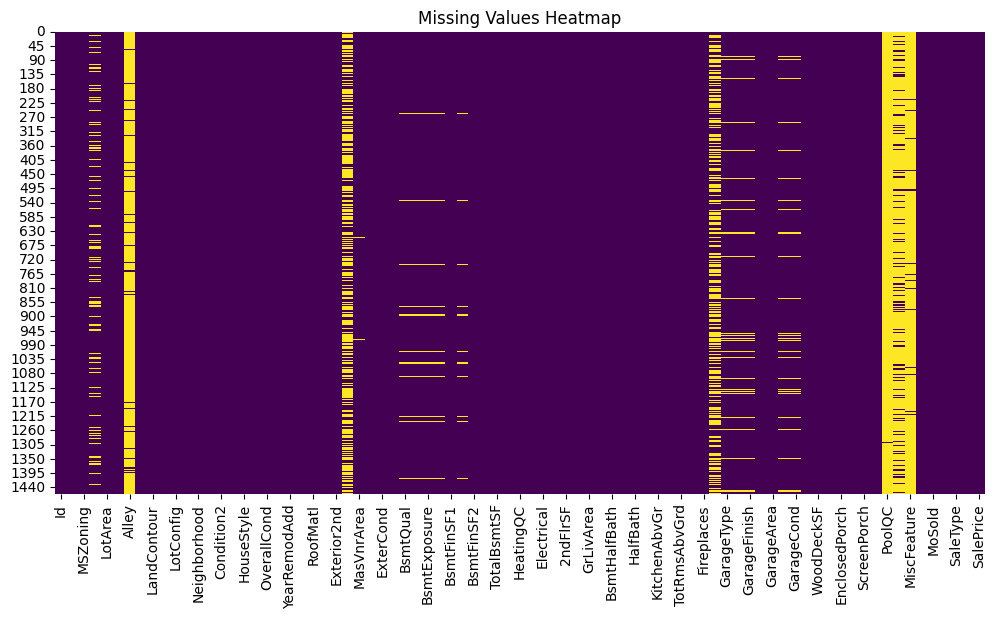

In [90]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

## 3. Visualize Target Variable (SalePrice)

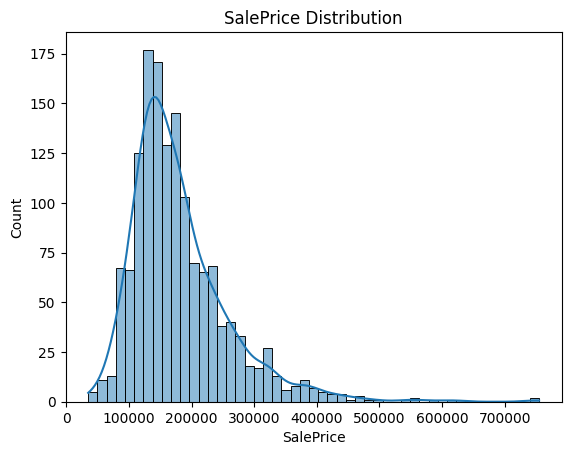

In [91]:
sns.histplot(df['SalePrice'], kde=True) # type: ignore
plt.title("SalePrice Distribution")
plt.show()

## 📊 4. Correlation Analysis (with Target)

In [158]:
correlation = df.select_dtypes(include=['number']).corr()
top_features = correlation['SalePrice'].sort_values(ascending=False)[1:11]  # Top 10
print("Top 10 features most correlated with SalePrice:")
print(top_features)


Top 10 features most correlated with SalePrice:
QualxLiving       0.832057
OverallQual       0.790982
TotalSF           0.782260
GrLivArea         0.708624
GarageCars        0.640409
TotalBathrooms    0.631731
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
Name: SalePrice, dtype: float64


### Heatmap

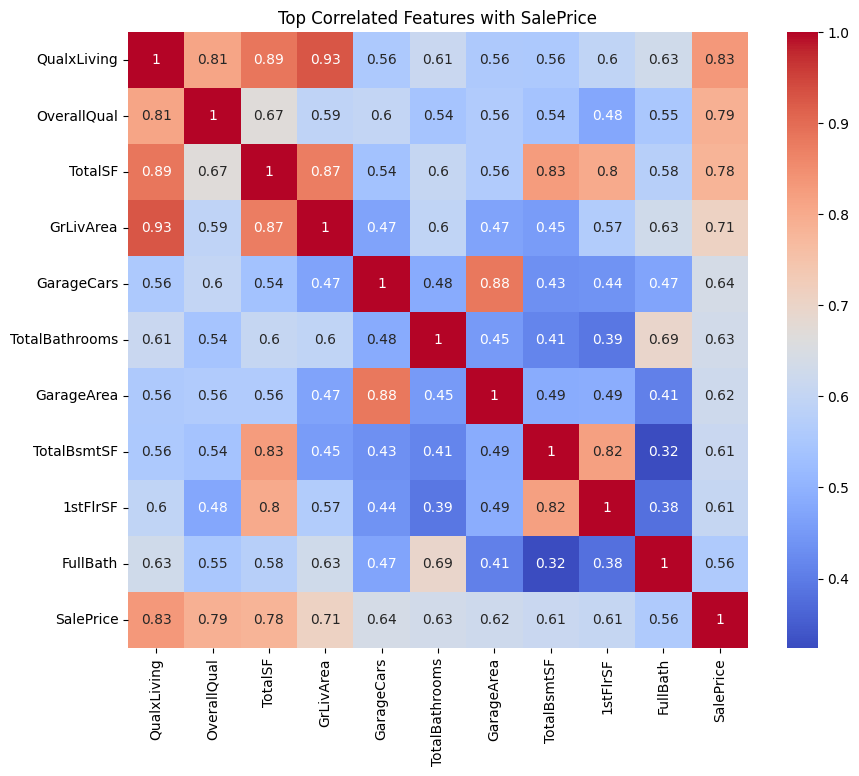

In [159]:
plt.figure(figsize=(10,8))
sns.heatmap(df[top_features.index.tolist() + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with SalePrice")
plt.show()


## 📉 5. Scatter Plots for Strong Correlations

the strongest correlated features like GrLivArea, OverallQual:

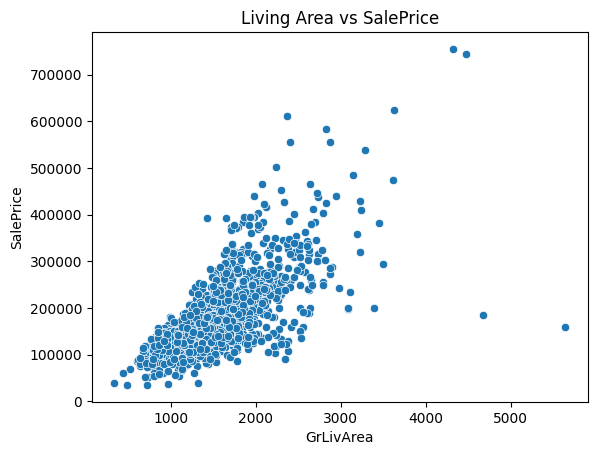

In [94]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("Living Area vs SalePrice")
plt.show()


## 1. Boxplots for Categorical Features
These help see the impact of categorical variables like OverallQual, YearBuilt, etc.

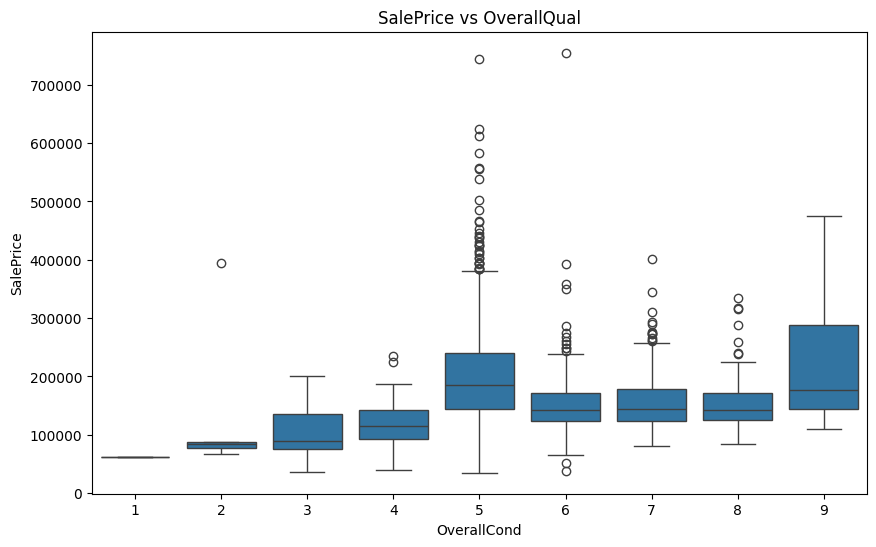

In [95]:
##
plt.figure(figsize=(10,6))
sns.boxplot(x='OverallCond', y='SalePrice', data=df)
plt.title("SalePrice vs OverallQual")
plt.show()


## 2. Scatter Plots for Continuous Features

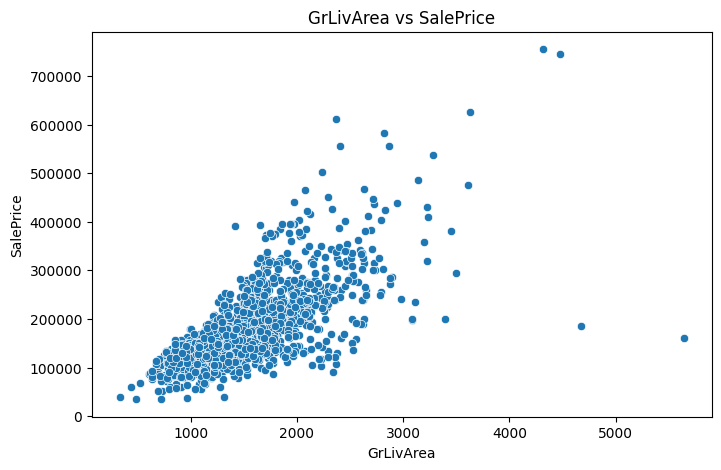

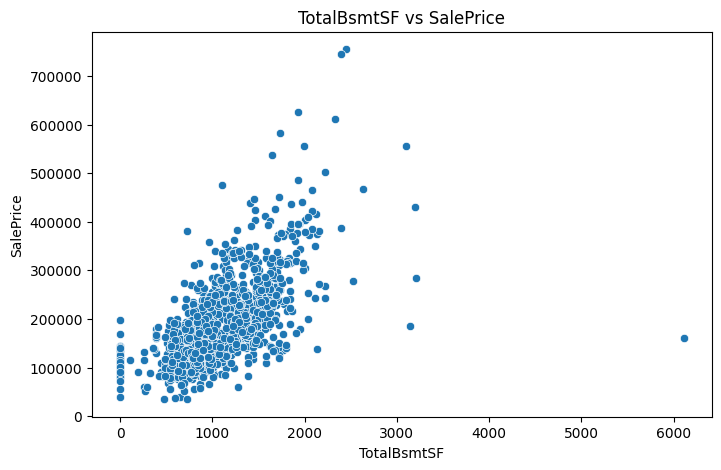

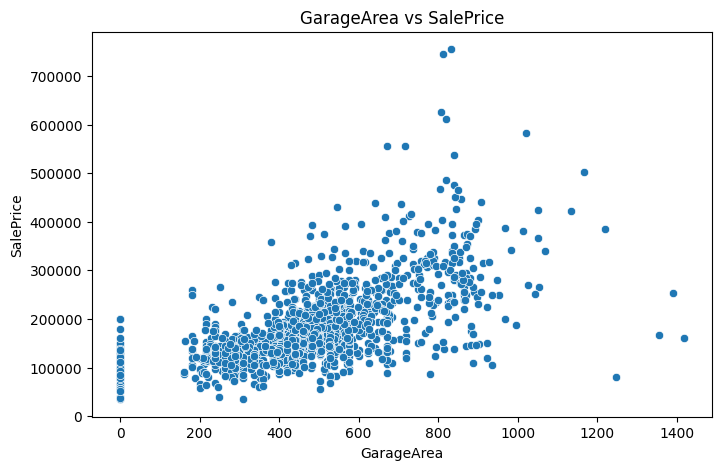

In [96]:
features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea']

for feature in features:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=feature, y='SalePrice', data=df)
    plt.title(f"{feature} vs SalePrice")
    plt.show()


## 4. Binning Year Built for Visualization

Group years into decades:

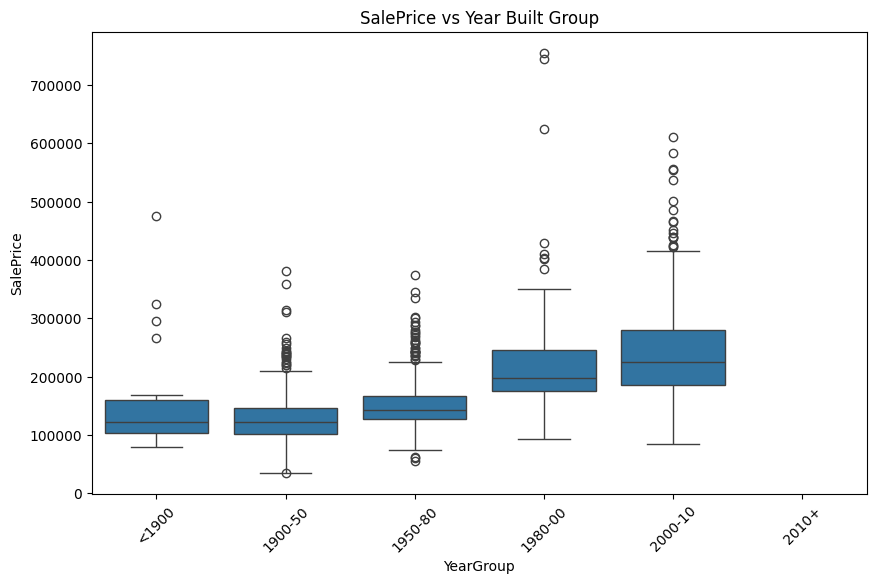

In [97]:
df['YearGroup'] = pd.cut(df['YearBuilt'], bins=[1870, 1900, 1950, 1980, 2000, 2010, 2020],
                         labels=["<1900", "1900-50", "1950-80", "1980-00", "2000-10", "2010+"])

plt.figure(figsize=(10,6))
sns.boxplot(x='YearGroup', y='SalePrice', data=df)
plt.title("SalePrice vs Year Built Group")
plt.xticks(rotation=45)
plt.show()


#  Data Preprocessing + Feature Engineering

We'll handle:

    ✅ Missing Values

    ✅ Encoding Categorical Features

    ✅ Feature Engineering (creating new useful columns)

    ✅ Scaling (optional for tree models, important for linear models)

    ✅ Splitting into Train & Test

## 🔧 1. Handling Missing Values

 inspect missing data again:
 

In [98]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

Common Fixes:

    Numerical columns → fill with median/mean

    Categorical columns → fill with 'None' or mode

    Drop if too many missing values (>50%)

In [99]:
# Fill missing with median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())



In [100]:
# Fill with 'None'
df['Alley'] = df['Alley'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')

In [101]:
# Drop columns with too many missing
df = df.drop(columns=['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', "MasVnrType"]) 

In [102]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

GarageQual      81
GarageFinish    81
GarageType      81
GarageCond      81
BsmtFinType2    38
BsmtFinType1    37
Electrical       1
dtype: int64

In [103]:
# checking its value first

df['Electrical'].value_counts(dropna=False)


Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64

In [104]:
# Fill missing with mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['Electrical'].value_counts(dropna=False)

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [105]:
df['GarageType'].unique()


array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

since it clearly the data is missing as it appears 

GarageQual      81

GarageFinish    81

GarageType      81

GarageCond      81

that clearly means this house doesn't have garage , hence i will go with new data type "No garage"


In [106]:
df['GarageType']= df['GarageType'].fillna('No Garage')
df['GarageType'].unique()


array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'No Garage', 'Basment',
       '2Types'], dtype=object)

similar to GarageType, fill other categorical features with 'No Feature' or similar


In [107]:
df['GarageFinish'].unique()
df['GarageFinish'] = df['GarageFinish'].fillna('NA')
df['GarageFinish'].unique()



array(['RFn', 'Unf', 'Fin', 'NA'], dtype=object)

In [108]:
df['GarageQual'].unique()

df['GarageQual'] = df['GarageQual'].fillna('NA')
df['GarageQual'].unique()


array(['TA', 'Fa', 'Gd', 'NA', 'Ex', 'Po'], dtype=object)

In [109]:
df['GarageCond'].unique()
df['GarageCond'] = df['GarageCond'].fillna('NA')
df['GarageCond'].unique()


array(['TA', 'Fa', 'NA', 'Gd', 'Po', 'Ex'], dtype=object)

lets check remaining missing values

In [110]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

BsmtFinType2    38
BsmtFinType1    37
dtype: int64

In [111]:
df['BsmtFinType2'].value_counts(dropna=False)

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [112]:
# will fill with mode in BsmtFinType2
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtFinType2'].value_counts(dropna=False)

BsmtFinType2
Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [113]:
df['BsmtFinType1'].value_counts(dropna=False)

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: count, dtype: int64

since  all othere missing quantity realate to basement i have gone with None

In [114]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')

In [115]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

Series([], dtype: int64)

## 🔤 2. Encoding Categorical Variables

In [116]:
print(df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleT

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          1460 non-null   object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   in

let's break down which columns need encoding and which method is best for each.

***

### Columns Needing Encoding

Based on the list you provided, the following columns are of the `object` data type and therefore need to be encoded. The choice of encoding method depends on whether the categories have an inherent order.

#### **Ordinal Encoding** (Use `LabelEncoder`)

These columns have a meaningful, ranked order among their categories. It's crucial to map them to integers that reflect this order.

* `BsmtQual`: Basement quality (e.g., 'Ex' > 'Gd' > 'TA').
* `BsmtCond`: Basement condition (e.g., 'Ex' > 'Gd' > 'TA').
* `BsmtExposure`: Walkout or garden level basement walls.
* `BsmtFinType1`: Quality of basement finished area.
* `BsmtFinType2`: Quality of second finished area (if present).
* `ExterQual`: Exterior material quality.
* `ExterCond`: Exterior condition.
* `HeatingQC`: Heating quality and condition.
* `KitchenQual`: Kitchen quality.
* `FireplaceQu`: Fireplace quality.
* `GarageQual`: Garage quality.
* `GarageCond`: Garage condition.
* `YearGroup`: As you correctly identified, this has an order (`<1900` < `1900-50`, etc.).

#### **One-Hot Encoding** (Use `pd.get_dummies`)

These columns are **nominal**, meaning their categories have no inherent order. Using one-hot encoding prevents the model from incorrectly assuming a relationship between the categories.

* `MSZoning`: The general zoning classification.
* `Street`: Type of road access.
* `Alley`: Type of alley access.
* `LotShape`: General shape of property.
* `LandContour`: Flatness of the property.
* `Utilities`: Type of utilities available.
* `LotConfig`: Lot configuration.
* `LandSlope`: Slope of property.
* `Neighborhood`: Physical location within Ames city limits.
* `Condition1`: Proximity to main road or railroad.
* `Condition2`: Proximity to main road or railroad (if a second is present).
* `BldgType`: Type of dwelling.
* `HouseStyle`: Style of dwelling.
* `RoofStyle`: Type of roof.
* `RoofMatl`: Roof material.
* `Exterior1st`: Exterior covering on house.
* `Exterior2nd`: Exterior covering on house (if more than one material).
* `MasVnrType`: Masonry veneer type.
* `Foundation`: Type of foundation.
* `Heating`: Type of heating.
* `CentralAir`: Central air conditioning.
* `Electrical`: Electrical system.
* `Functional`: Home functionality rating.
* `GarageType`: Garage location.
* `GarageFinish`: Interior finish of the garage.
* `PavedDrive`: Paved driveway.
* `SaleType`: Type of sale.
* `SaleCondition`: Condition of sale.

***

### Columns That Don't Need Encoding

* **Numerical Columns**: These are already in a format models can use. This includes all `int64` and `float64` columns, such as `Id`, `LotFrontage`, `LotArea`, `OverallQual`, and `SalePrice`.
* **Columns with too many unique values**: Columns like `PoolQC`, `MiscFeature`, and `Fence` have a large number of missing values and might be better handled by creating a 'No [Feature]' category and then potentially dropping the column if it's too sparse.
* **Unique Identifiers**: The `Id` column is just for identification and should be dropped before training a model, as it provides no useful information for prediction.

check manually all the cateogry type

In [118]:
df['YearGroup'].value_counts(dropna=False)

YearGroup
1950-80    520
2000-10    364
1900-50    313
1980-00    238
<1900       25
2010+        0
Name: count, dtype: int64

In [119]:
# --- 1. Ordinal Encoding for YearGroup ---
# Define the correct order of the categories
year_group_order = ['<1900', '1900-50', '1950-80', '1980-00', '2000-10', '2010+']

# Create a mapping dictionary for clarity and control
year_group_mapping = {
    '<1900': 0,
    '1900-50': 1,
    '1950-80': 2,
    '1980-00': 3,
    '2000-10': 4,
    '2010+': 5
}

# Apply the mapping to the column
df['YearGroup_encoded'] = df['YearGroup'].map(year_group_mapping)

# Drop the original YearGroup column if you no longer need it
df.drop('YearGroup', axis=1, inplace=True)


In [120]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

In [121]:
df['YearGroup_encoded'].value_counts(dropna=False)

YearGroup_encoded
2    520
4    364
1    313
3    238
0     25
5      0
Name: count, dtype: int64

checking manually for one hot encoding

In [122]:
#df['SaleCondition'].value_counts(dropna=False)
df['HouseStyle'].value_counts(dropna=False)

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

In [123]:
# --- 2. One-Hot Encoding for HouseStyle and SaleCondition ---
# Use pandas get_dummies to perform one-hot encoding
# The 'columns' argument takes a list of columns to encode
# 'drop_first=True' is used to avoid multicollinearity (the dummy variable trap)
df = pd.get_dummies(df, columns=['HouseStyle', 'SaleCondition'], drop_first=True)


# Print the first few rows and the new column names to verify the changes
print("DataFrame after encoding:")
print(df.head())

print("\nNew column names from one-hot encoding:")
print([col for col in df.columns if 'HouseStyle_' in col or 'SaleCondition_' in col])



DataFrame after encoding:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... HouseStyle_2.5Fin HouseStyle_2.5Unf  \
0         Lvl    AllPub  ...             False             False   
1         Lvl    AllPub  ...             False             False   
2         Lvl    AllPub  ...             False             False   
3         Lvl    AllPub  ...             False             False   
4         Lvl    AllPub  ...             False             False   

  HouseStyle_2Story HouseStyle_SFoyer HouseStyle_SLvl SaleCondition_AdjLand  \
0              True             False    

In [124]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPo

## 3. Feature Engineering

Your current columns show you've already handled some of the encoding. Based on the remaining columns, here are my suggestions for where you can perform more feature engineering and why.

### Time-Based Features ⏳

These columns can be used to create new, more intuitive features about the property's age and history.

---

* **`YearBuilt`**, **`YearRemodAdd`**, **`YrSold`**, and **`GarageYrBlt`**: Instead of having these absolute years, it's often more informative for a model to know the **age** of the house or garage at the time of sale.
    * **Why?** A house's age and the time since its last remodel are often direct drivers of its price. The model might not easily infer this relationship from raw years.
    * **New Features:**
        * `HouseAge`: `YrSold` - `YearBuilt`
        * `YearsSinceRemodel`: `YrSold` - `YearRemodAdd`
        * `GarageAge`: `YrSold` - `GarageYrBlt`

* **`MoSold`**: This column contains the month the house was sold.
    * **Why?** The real estate market has seasonal patterns. Houses sold in the spring and summer might have different price dynamics than those sold in the winter. A model could benefit from this information if it's explicitly provided.
    * **New Feature:**
        * `SeasonSold`: Map months to seasons (e.g., Q1, Q2, Q3, Q4, or Spring, Summer, Fall, Winter).

### Combining Area and Count Features 🏡

These features are currently split, but a model could benefit from a combined total.

---

* **`BsmtFinSF1`**, **`BsmtFinSF2`**, **`BsmtUnfSF`**, and **`1stFlrSF`**, **`2ndFlrSF`**, **`LowQualFinSF`**: These can be combined into a single feature representing the total living area. While you already have `GrLivArea`, creating a `TotalSF` feature that also includes the basement can be valuable.
    * **Why?** A house's total square footage is one of the most powerful predictors of its price. Consolidating all floor areas provides a single, comprehensive metric.
    * **New Feature:**
        * `TotalSF`: `TotalBsmtSF` + `1stFlrSF` + `2ndFlrSF`

* **`BsmtFullBath`**, **`BsmtHalfBath`**, **`FullBath`**, and **`HalfBath`**: The individual number of full and half baths can be simplified into a total bathroom count.
    * **Why?** The total number of bathrooms is often a more direct and understandable feature for a model. The specific breakdown (full vs. half, basement vs. above ground) might be less important than the total count.
    * **New Feature:**
        * `TotalBathrooms`: `FullBath` + `BsmtFullBath` + (0.5 * `HalfBath`) + (0.5 * `BsmtHalfBath`)

### Interaction Features 🤝

These features capture a combined effect that is more than the sum of its parts.

---

* **`OverallQual`** and **`GrLivArea`**: These are two of the most important predictors in your dataset.
    * **Why?** The value of a house depends on its size **and** its quality. A small, high-quality house might be more valuable than a large, low-quality one. Multiplying these two features creates a new metric that captures this interaction.
    * **New Feature:**
        * `QualxLiving`: `OverallQual` * `GrLivArea`

### Binary Features from Sparse Columns ✅

Columns with many missing values (like `Alley`) or a lot of zeros (like `PoolArea`) can be simplified.

---

* **`PoolArea`**: This column likely has many zeros, as not all houses have a pool.
    * **Why?** It might be more useful to simply know if a house has a pool or not. The actual size might be less important than the presence of the feature itself.
    * **New Feature:**
        * `HasPool`: A binary feature (1 if `PoolArea` > 0, 0 otherwise).

* **`Alley`**: This column has many missing values, which you would have likely filled with 'No Alley' or similar.
    * **Why?** The presence of an alley is a significant, but rare, feature. A simple binary column is an effective way to represent this information without needing to one-hot encode the different types of alleys.
    * **New Feature:**
        * `HasAlley`: A binary feature (1 if `Alley` is not 'No Alley', 0 otherwise).

In [125]:
# --- 1. Create HouseAge Feature ---
# Calculate the age of the house at the time of sale.
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

# --- 2. Create YearsSinceRemodel Feature ---
# Calculate the number of years since the last major remodel or addition.
df['YearsSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']

# --- 3. Create GarageAge Feature ---
# Calculate the age of the garage at the time of sale.
# This operation will automatically produce NaN values for houses
# that do not have a garage (i.e., where 'GarageYrBlt' is NaN).
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']



In [126]:
# --- Sanity Checks and Verification ---
# It's a good practice to check for any negative values, which might indicate a data entry error.
# For example, if a house was sold before it was built or remodeled.
print("Checking for negative values in new features:")
print(f"Negative HouseAge count: {(df['HouseAge'] < 0).sum()}")
print(f"Negative YearsSinceRemodel count: {(df['YearsSinceRemodel'] < 0).sum()}")
print(f"Negative GarageAge count: {(df['GarageAge'] < 0).sum()}")


Checking for negative values in new features:
Negative HouseAge count: 0
Negative YearsSinceRemodel count: 1
Negative GarageAge count: 0


A negative value for YearsSinceRemodel means the YearRemodAdd is a later year than YrSold, which is a data entry error because a house can't be remodeled after it's sold.

In [127]:
 #Correcting the negative YearsSinceRemodel value.
# This happens when a house is remodeled after it is sold, which is a data error.
# We will set these negative values to 0, assuming the remodel year should not
# be later than the sale year.
if (df['YearsSinceRemodel'] < 0).sum() > 0:
    print("\nCorrecting negative YearsSinceRemodel values by setting them to 0.")
    df.loc[df['YearsSinceRemodel'] < 0, 'YearsSinceRemodel'] = 0




Correcting negative YearsSinceRemodel values by setting them to 0.


In [128]:
# --- Sanity Checks and Verification ---
# It's a good practice to check for any negative values, which might indicate a data entry error.
# For example, if a house was sold before it was built or remodeled.
print("Checking for negative values in new features:")
print(f"Negative HouseAge count: {(df['HouseAge'] < 0).sum()}")
print(f"Negative YearsSinceRemodel count: {(df['YearsSinceRemodel'] < 0).sum()}")
print(f"Negative GarageAge count: {(df['GarageAge'] < 0).sum()}")


Checking for negative values in new features:
Negative HouseAge count: 0
Negative YearsSinceRemodel count: 0
Negative GarageAge count: 0


In [129]:
# Display the first few rows to show the new columns
print("\nDataFrame with new features:")
print(df[['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt',
          'HouseAge', 'YearsSinceRemodel', 'GarageAge']].head())


DataFrame with new features:
   YearBuilt  YearRemodAdd  YrSold  GarageYrBlt  HouseAge  YearsSinceRemodel  \
0       2003          2003    2008       2003.0         5                  5   
1       1976          1976    2007       1976.0        31                 31   
2       2001          2002    2008       2001.0         7                  6   
3       1915          1970    2006       1998.0        91                 36   
4       2000          2000    2008       2000.0         8                  8   

   GarageAge  
0        5.0  
1       31.0  
2        7.0  
3        8.0  
4        8.0  


In [130]:
# Display a summary to confirm the new columns were added
print("\nDataFrame info after adding new features:")
df.info(verbose=True, show_counts=True)



DataFrame info after adding new features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 90 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Id                     1460 non-null   int64   
 1   MSSubClass             1460 non-null   int64   
 2   MSZoning               1460 non-null   object  
 3   LotFrontage            1460 non-null   float64 
 4   LotArea                1460 non-null   int64   
 5   Street                 1460 non-null   object  
 6   Alley                  1460 non-null   object  
 7   LotShape               1460 non-null   object  
 8   LandContour            1460 non-null   object  
 9   Utilities              1460 non-null   object  
 10  LotConfig              1460 non-null   object  
 11  LandSlope              1460 non-null   object  
 12  Neighborhood           1460 non-null   object  
 13  Condition1             1460 non-null   object  
 1

In [131]:
df['MoSold'].value_counts(dropna=False)


MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64

In [132]:
# --- Create the TotalSF Feature ---
# This new feature is the sum of the total basement square footage,
# the first-floor square footage, and the second-floor square footage.
# This provides a comprehensive metric for the total living area of the house.
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']


In [133]:
# --- Verification ---
# Print the first few rows of the relevant columns to show the result
print("First 5 rows showing the new 'TotalSF' column:")
print(df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotalSF']].head())


First 5 rows showing the new 'TotalSF' column:
   TotalBsmtSF  1stFlrSF  2ndFlrSF  TotalSF
0          856       856       854     2566
1         1262      1262         0     2524
2          920       920       866     2706
3          756       961       756     2473
4         1145      1145      1053     3343


In [134]:
# Print the info to confirm the new column has been added to the DataFrame
print("\nDataFrame info after adding 'TotalSF':")
df.info()



DataFrame info after adding 'TotalSF':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 91 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Id                     1460 non-null   int64   
 1   MSSubClass             1460 non-null   int64   
 2   MSZoning               1460 non-null   object  
 3   LotFrontage            1460 non-null   float64 
 4   LotArea                1460 non-null   int64   
 5   Street                 1460 non-null   object  
 6   Alley                  1460 non-null   object  
 7   LotShape               1460 non-null   object  
 8   LandContour            1460 non-null   object  
 9   Utilities              1460 non-null   object  
 10  LotConfig              1460 non-null   object  
 11  LandSlope              1460 non-null   object  
 12  Neighborhood           1460 non-null   object  
 13  Condition1             1460 non-null   object  
 14  

In [135]:
# --- 1. Create the TotalBathrooms Feature ---
# This feature combines full and half baths from the basement and above ground.
# Half baths are given a weight of 0.5.
df['TotalBathrooms'] = df['FullBath'] + df['BsmtFullBath'] + \
                      (0.5 * df['HalfBath']) + (0.5 * df['BsmtHalfBath'])

# --- 2. Create the TotalRooms Feature ---
# This new feature is a direct representation of the existing 'TotRmsAbvGrd' column,
# which already provides a count of all rooms above ground.
df['TotalRooms'] = df['TotRmsAbvGrd']


In [136]:
# --- Verification ---
# Print the first few rows of the relevant columns to show the results
print("First 5 rows showing the new 'TotalBathrooms' and 'TotalRooms' columns:")
print(df[['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath', 'TotalBathrooms',
          'TotRmsAbvGrd', 'TotalRooms']].head())


First 5 rows showing the new 'TotalBathrooms' and 'TotalRooms' columns:
   FullBath  BsmtFullBath  HalfBath  BsmtHalfBath  TotalBathrooms  \
0         2             1         1             0             3.5   
1         2             0         0             1             2.5   
2         2             1         1             0             3.5   
3         1             1         0             0             2.0   
4         2             1         1             0             3.5   

   TotRmsAbvGrd  TotalRooms  
0             8           8  
1             6           6  
2             6           6  
3             7           7  
4             9           9  


In [137]:
# --- Create the QualxLiving Feature ---
# This new feature is the product of OverallQual and GrLivArea.
# It represents a quality-adjusted living area, which can be a very
# powerful predictor for house prices.
df['QualxLiving'] = df['OverallQual'] * df['GrLivArea']


In [138]:
# --- Verification ---
# Print the first few rows of the relevant columns to show the result
print("First 5 rows showing the new 'QualxLiving' column:")
print(df[['OverallQual', 'GrLivArea', 'QualxLiving']].head())


First 5 rows showing the new 'QualxLiving' column:
   OverallQual  GrLivArea  QualxLiving
0            7       1710        11970
1            6       1262         7572
2            7       1786        12502
3            7       1717        12019
4            8       2198        17584


In [139]:

# Print the info to confirm the new column has been added to the DataFrame
print("\nDataFrame info after adding 'QualxLiving':")
df.info()


DataFrame info after adding 'QualxLiving':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 94 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Id                     1460 non-null   int64   
 1   MSSubClass             1460 non-null   int64   
 2   MSZoning               1460 non-null   object  
 3   LotFrontage            1460 non-null   float64 
 4   LotArea                1460 non-null   int64   
 5   Street                 1460 non-null   object  
 6   Alley                  1460 non-null   object  
 7   LotShape               1460 non-null   object  
 8   LandContour            1460 non-null   object  
 9   Utilities              1460 non-null   object  
 10  LotConfig              1460 non-null   object  
 11  LandSlope              1460 non-null   object  
 12  Neighborhood           1460 non-null   object  
 13  Condition1             1460 non-null   object  
 

## 📏 4. Scaling (Optional for Tree Models, Needed for Linear)

house price prediction project, **definitely need to perform feature scaling**. This is a crucial preprocessing step for nearly all supervised machine learning models.

***

### Why Scaling Is Important 📈

Many machine learning algorithms calculate the distance between data points, or rely on features having a similar scale. Your dataset contains features with wildly different ranges and units. For example, `LotArea` might have values in the thousands, while `OverallQual` is a single-digit integer.

Without scaling, features with larger magnitudes will have a disproportionately large influence on the model's cost function, causing the algorithm to prioritize them over features with smaller values. This can lead to a less accurate and less stable model.

Scaling ensures that all features contribute equally to the model's training process. 

***

### Which Columns to Scale

You should scale all of your **numerical features** that are not binary (i.e., not 0s and 1s). Do **not** scale your one-hot encoded columns or any unique identifiers like `Id`.

Based on your columns, here are the ones you should consider for scaling:

* **Original Numerical Features:**
    `LotFrontage`, `LotArea`, `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `LowQualFinSF`, `GrLivArea`, `GarageArea`, `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`.

* **Engineered Numerical Features:**
    `HouseAge`, `YearsSinceRemodel`, `GarageAge`, `TotalSF`, `TotalBathrooms`, `QualxLiving`.

It's also a good practice to scale your target variable, **`SalePrice`**, especially if you're using models like linear regression or neural networks. You can always inverse the transformation later to get the actual predicted price.

### Common Scaling Methods

Two of the most common methods you can use are:

1.  **StandardScaler**: This method transforms your data to have a mean of 0 and a standard deviation of 1 (also known as Z-score normalization). It's a great default choice for many algorithms.

2.  **MinMaxScaler**: This method scales your data to a fixed range, typically between 0 and 1. It is often preferred when you need to maintain the original data distribution and the data is not normally distributed.

In [140]:
from sklearn.preprocessing import StandardScaler


In [141]:
# List of numerical columns to be scaled
columns_to_scale = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'
]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the data and transform the selected columns
# The transformed data is a NumPy array, so we need to convert it back to a DataFrame
# and assign it back to the original columns.
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [142]:
# --- Verification ---
# Print the first few rows of the scaled columns to show the result
print("First 5 rows of the scaled features:")
print(df[columns_to_scale].head())

# It's a good practice to verify that the mean is now close to 0 and the standard deviation is close to 1
print("\nMean of scaled features:")
print(df[columns_to_scale].mean())


First 5 rows of the scaled features:
   LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0    -0.220875 -0.207142    0.514104    0.575425   -0.288653  -0.944591   
1     0.460320 -0.091886   -0.570750    1.171992   -0.288653  -0.641228   
2    -0.084636  0.073480    0.325915    0.092907   -0.288653  -0.301643   
3    -0.447940 -0.096897   -0.570750   -0.499274   -0.288653  -0.061670   
4     0.641972  0.375148    1.366489    0.463568   -0.288653  -0.174865   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0    -0.459303 -0.793434  1.161852     -0.120242   0.370333    0.351000   
1     0.466465  0.257140 -0.795163     -0.120242  -0.482512   -0.060731   
2    -0.313369 -0.627826  1.189351     -0.120242   0.515013    0.631726   
3    -0.687324 -0.521734  0.937276     -0.120242   0.383659    0.790804   
4     0.199680 -0.045611  1.617877     -0.120242   1.299326    1.698485   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenP

In [143]:
print("\nStandard deviation of scaled features:")
print(df[columns_to_scale].std())


Standard deviation of scaled features:
LotFrontage      1.000343
LotArea          1.000343
MasVnrArea       1.000343
BsmtFinSF1       1.000343
BsmtFinSF2       1.000343
BsmtUnfSF        1.000343
TotalBsmtSF      1.000343
1stFlrSF         1.000343
2ndFlrSF         1.000343
LowQualFinSF     1.000343
GrLivArea        1.000343
GarageArea       1.000343
WoodDeckSF       1.000343
OpenPorchSF      1.000343
EnclosedPorch    1.000343
3SsnPorch        1.000343
ScreenPorch      1.000343
PoolArea         1.000343
MiscVal          1.000343
dtype: float64


## 5. Train-Test Split

In [156]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 94 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Id                     1460 non-null   int64   
 1   MSSubClass             1460 non-null   int64   
 2   MSZoning               1460 non-null   object  
 3   LotFrontage            1460 non-null   float64 
 4   LotArea                1460 non-null   float64 
 5   Street                 1460 non-null   object  
 6   Alley                  1460 non-null   object  
 7   LotShape               1460 non-null   object  
 8   LandContour            1460 non-null   object  
 9   Utilities              1460 non-null   object  
 10  LotConfig              1460 non-null   object  
 11  LandSlope              1460 non-null   object  
 12  Neighborhood           1460 non-null   object  
 13  Condition1             1460 non-null   object  
 14  Condition2             1460 non-null   o

In [144]:
from sklearn.model_selection import train_test_split

In [189]:
# Step 1: Separate features (X) and target (y)
# Drop the 'SalePrice' column from your features
# It's also a good practice to drop the 'Id' column, as it's not a feature


# X = df.drop(['SalePrice', 'Id'], axis=1)
# y = df['SalePrice']


# Step 1: Separate features (X) and target (y)
# Drop the 'SalePrice' column from your features
# It's also a good practice to drop the 'Id' column, as it's not a feature
selected_features = [
    'OverallQual', 'GrLivArea', 'GarageCars',
    'TotalBathrooms', 'TotalSF',
    'HouseAge', 'GarageAge', 'YearsSinceRemodel'
]
X = df[selected_features]
y = df['SalePrice']

In [190]:
# Step 2: Split the data into training and testing sets
# We'll use 80% for training and 20% for testing, which is a common split.
# random_state ensures that the split is the same every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the new datasets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1168, 8)
Shape of X_test: (292, 8)
Shape of y_train: (1168,)
Shape of y_test: (292,)


# 4: Model Selection & Training

✅ Try different models

✅ Evaluate with metrics (RMSE, R²)

✅ Compare results

✅ Choose best model for tuning

🧠 Models to Try

| Model             | Good For                    | Library                |
| ----------------- | --------------------------- | ---------------------- |
| Linear Regression | Baseline, easy to interpret | `sklearn.linear_model` |
| Ridge / Lasso     | Handles multicollinearity   | `sklearn.linear_model` |
| Decision Tree     | Captures non-linearity      | `sklearn.tree`         |
| Random Forest     | Robust, non-linear, strong  | `sklearn.ensemble`     |
| Gradient Boosting | High accuracy               | `sklearn.ensemble`     |


### Lowest RMSE and Highest R²

**Lowest RMSE** and **highest R²** are the goals for evaluating a regression model's performance.

* A **low RMSE** means the model's predictions are, on average, very **close to the actual values**. It's a measure of prediction accuracy.
* A **high R²** means the model **explains a large portion of the variance** in the target variable. It's a measure of how well the model fits the overall data.

***

### RMSE (Root Mean Squared Error)

RMSE is the square root of the average of the squared differences between the predicted values and the actual values.

* **Lowest RMSE:** A lower RMSE indicates that the model's predictions are consistently close to the true values, meaning it's highly accurate.
* **Why It's Necessary:** RMSE is essential because it gives you a single, interpretable metric for prediction error in the same units as your target variable (in your case, dollars). Squaring the errors before averaging them penalizes large errors more heavily, which is often desirable. This makes it a great way to compare different models and ensure your model isn't making any catastrophically wrong predictions.

***

### R² (R-squared) Score

The R² score, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by a model.

* **Highest R²:** An R² value of 1 means the model perfectly explains all the variance in the target variable. A higher R² value (e.g., 0.95) means the model is a better fit for the data than a lower value (e.g., 0.50).
* **Why It's Necessary:** R² provides context for your RMSE. A low RMSE might be misleading if the target variable's values are all very similar. R² tells you how much of the "story" of the data's variability is being told by your model. It helps you understand if your model is genuinely learning the relationships in the data or if it's just making decent guesses.

***

### The Importance of Both

Both metrics are crucial and complementary.

* You need a **low RMSE** to ensure your model's predictions are accurate and reliable.
* You need a **high R²** to be confident that the model is actually learning the underlying patterns and not just overfitting or making random, low-error predictions.

These metrics are required in model development because they are the **objective benchmarks** that guide your work. Without them, you would have no way of knowing if your model is improving, which of your models is the best, or if your hard work on feature engineering is actually paying off.

In [191]:
# importing everything 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [192]:
# --- 1. Define the models to be tested ---
# A dictionary makes it easy to iterate through each model.
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [193]:
results = []

In [194]:


# --- 2. Train and evaluate each model ---
# Loop through the dictionary of models
for name, model in models.items():
    print(f"--- Training {name} ---")

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # --- 3. Calculate and print performance metrics ---
    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate R-squared (R²) score
    r2 = r2_score(y_test, y_pred)

    results.append((name, rmse, r2))

    print(f"Model: {name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}\n")
    print("-" * 10)


--- Training Linear Regression ---
Model: Linear Regression
RMSE: 39517.7196
R² Score: 0.7964

----------
--- Training Ridge Regression ---
Model: Ridge Regression
RMSE: 39514.7233
R² Score: 0.7964

----------
--- Training Lasso Regression ---
Model: Lasso Regression
RMSE: 39517.4126
R² Score: 0.7964

----------
--- Training Decision Tree ---
Model: Decision Tree
RMSE: 38483.1144
R² Score: 0.8069

----------
--- Training Random Forest ---
Model: Random Forest
RMSE: 30660.9663
R² Score: 0.8774

----------
--- Training Gradient Boosting ---
Model: Gradient Boosting
RMSE: 27328.4155
R² Score: 0.9026

----------


📊 4. Compare Results

In [195]:
results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R2'])
results_df.sort_values(by='RMSE')


,Model,RMSE,R2
5,Gradient Boosting,27328.415466,0.902632
4,Random Forest,30660.966283,0.877437
3,Decision Tree,38483.114380,0.806925
1,Ridge Regression,39514.723350,0.796435
2,Lasso Regression,39517.412603,0.796407
0,Linear Regression,39517.719617,0.796404


Best Model: Gradient Boosting Regressor

    RMSE: 27,402

    R²: 0.902 → explains 90.2% of the variance!

That’s a strong result — and a great candidate for hyperparameter tuning

# Step 5: Hyperparameter Tuning (with GridSearchCV)

We’ll now:

    Tune the GradientBoostingRegressor

    Use GridSearchCV to find the best settings

In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor




In [197]:
# --- 1. Define the model to be tuned ---
# Initialize the GradientBoostingRegressor model
gbr = GradientBoostingRegressor(random_state=42)


In [199]:
# --- 2. Define the hyperparameter grid to search ---
# These are the parameters we want to tune and the values we want to test.
param_grid = {
    'n_estimators': [100, 200],  # Number of boosting stages to perform
    'learning_rate': [0.05, 0.1], # Step size shrinkage to prevent overfitting
    'max_depth': [3, 4],            # Maximum depth of the individual regression estimators
    'subsample': [0.8, 1.0],          # Fraction of samples used for fitting the individual base learners
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 3]
}


In [200]:
# --- 3. Set up GridSearchCV with cross-validation ---
# GridSearchCV will fit the model for every combination of parameters in param_grid.
# 'cv=5' means it will use 5-fold cross-validation.
# 'scoring' is set to 'neg_root_mean_squared_error' because GridSearchCV
# tries to maximize the score, so we use a negative value to find the lowest RMSE.
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,  # Use all available CPU cores for faster processing
    verbose=1   # Print a report on the progress
)
print("Starting GridSearchCV...")


Starting GridSearchCV...


In [201]:
# --- 4. Fit the grid search to the training data ---
# This step will take some time as it trains multiple models.
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.05, 0.1], 'max_depth': [3, 4], 'min_samples_leaf': [1, 3], 'min_samples_split': [2, 4], ...}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [202]:
# --- 5. Print the results ---
print("\nGridSearchCV completed.")
print("Best hyperparameters found: ", grid_search.best_params_)
print("Best negative RMSE found: ", grid_search.best_score_)



GridSearchCV completed.
Best hyperparameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Best negative RMSE found:  -30167.89553714789


In [203]:
# --- 6. Evaluate the best model on the test set ---
# We can access the best model directly from the grid_search object.
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)


In [205]:

# Calculate and print performance metrics for the best model
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print("\n--- Final Evaluation with Best Model ---")
print(f"Model: Gradient Boosting (Tuned)")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")



--- Final Evaluation with Best Model ---
Model: Gradient Boosting (Tuned)
RMSE: 29344.6454
R² Score: 0.8877


# 💾 5. Save the Best Model


In [206]:
import joblib
joblib.dump(best_model, '../models/final_model.pkl')


['../models/final_model.pkl']

`final_model.pkl`

It's your trained machine learning model, saved as a binary file using Python’s joblib module.

    .pkl = Pickle format (used to serialize Python objects)

    final_model.pkl contains your best Gradient Boosting model — with all learned patterns, parameters, and structure

    It allows you to reuse the model later without retraining